In [1]:
import cv2
from matplotlib import pyplot as plt
from lane_detection import *
from lane_following import *

In [9]:
IP_ADDRESS = "192.168.1.102"

In [13]:
vcap = cv2.VideoCapture(f"rtsp://{IP_ADDRESS}:8554/rovcam")

img = None

MAX_RETRY = 100
count = 0
while count < MAX_RETRY:
    count += 1
    # Obtain the frame
    ret, frame = vcap.read()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()


[tcp @ 0x2e7c25a0] Connection to tcp://192.168.1.102:8554?timeout=0 failed: Connection refused
[ERROR:0@115.436] global cap.cpp:164 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.0) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): rtsp://192.168.1.102:8554/rovcam in function 'icvExtractPattern'




error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


 got a frame 
1/ slope:-1.2797202797202798
1/ slope:-1.2797202797202798
1/ slope:-1.2797202797202798
1/ slope:-1.2797202797202798
1/ slope:-1.2797202797202798
1/ slope:-1.2797202797202798
1/ slope:-0.7268518518518519
1/ slope:-0.7268518518518519
1/ slope:-0.7268518518518519
1/ slope:-0.7268518518518519
1/ slope:-0.7268518518518519
1/ slope:-0.7268518518518519
1/ slope:-0.7268518518518519
1/ slope:-0.7268518518518519
1/ slope:0.3024390243902439
1/ slope:0.3024390243902439
1/ slope:-0.7247706422018348
1/ slope:-0.7247706422018348
1/ slope:-0.7247706422018348
1/ slope:-0.7247706422018348
1/ slope:-0.7247706422018348
1/ slope:-0.7247706422018348
1/ slope:-0.7247706422018348
1/ slope:-1.1833333333333333
1/ slope:-1.1833333333333333
1/ slope:-1.2747252747252749
1/ slope:-1.2747252747252749
1/ slope:-1.2747252747252749
1/ slope:-1.2747252747252749
1/ slope:0.30405405405405406
1/ slope:0.8
1/ slope:-0.24305555555555558
1/ slope:-0.24305555555555558
1/ slope:-2.3333333333333335
1/ slope:-2.3333

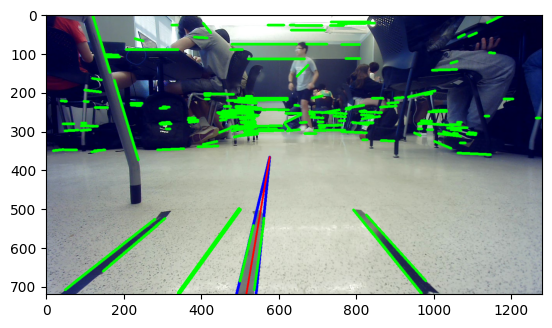

In [15]:

#cv2.imwrite("frame.jpg", frame2)
frame = cv2.imread('frame1.jpg')
ret = True
#print(f"vid attempt #{count}")
# Check frame was received successfully
if ret:
    # got a frame, close the cap and return the frame
    print(" got a frame ")
    lines = detect_lines(frame, 30, 90, 3,10,10)
    #print (lines)

    #try: 
    #    frame = draw_lines(frame, lines,(0, 255, 0))
    #    print ("tried to draw lines")
    #except :
    #     pass
    try:
        lanes = detect_lanes(lines)
        print ("tried to detect lanes")
        pickedLane = pick_lane(lanes)
        print ("tried to pick lanes")
        frame = draw_Single_lane(frame, pickedLane, (255, 0, 0))
        frame = draw_lines(frame, lines,(0, 255, 0))
        print ("tried to draw lanes")
        center_intercept, center_slope = get_lane_center(pickedLane)
        xPoint = pickedLane[0][2]
        yPoint = pickedLane[0][3]
        
    except:
        pass
    #cv2.line(frame, (80, 1080), (500, 500), (0,0,255), 3)
    cv2.line(frame, (int(center_intercept), 1080), (int(xPoint), int(yPoint)), (0,0,255), 3)
    
    #recommend_direction(center_intercept, center_slope)
    height, width, layers = frame.shape
    size = (width,height)
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.show()
    #print(f"currently on frame: {i}")
    #vcap.release()

In [ ]:
type(img)

NoneType

TypeError: Image data of dtype object cannot be converted to float

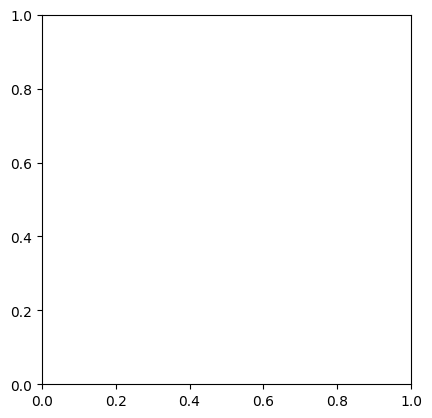

In [ ]:
plt.imshow(img)